## Vectors in python

In [2]:
# In python, a vector can be represented in many ways, the simplest being a regular python list of numbers:
# Vectors are simply a list of numbers, or matrices of 1×n dimensions.

[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

In [3]:
# Since we plan to do quite a lot of scientific calculations, it is much better to use NumPy's ndarray, 
# which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors

import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

In [4]:
# The size of a vector can be obtained using the size attribute:

video.size

4

In [38]:
video.shape

(4,)

In [5]:
# Note that indices in mathematics generally start at 1, but in programming they usually start at 0. So to access 3rd element
# programmatically, we would write:

video[2]

3.25

## Plotting vectors

In [6]:
# To plot vectors we will use matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# Let's create a couple very simple 2D vectors to plot:

u = np.array([2, 5])
v = np.array([3, 1])

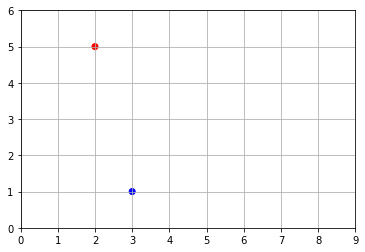

In [8]:
# These vectors each have 2 elements, so they can easily be represented graphically on a 2D graph, for example as points:

x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color = ['r', 'b'])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

In [13]:
# Vectors can also be represented as arrows.

def plot_vector2d(vector2d, origin = [0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1], head_width = 0.2, head_length = 0.3,
                     length_includes_head = True, **options)

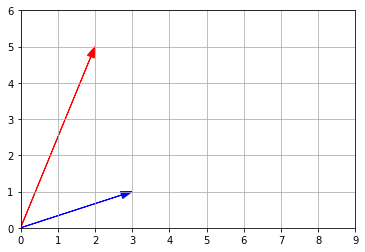

In [15]:
# Now let's draw the vectors u and v as arrows:

plot_vector2d(u, color = 'r')
plot_vector2d(v, color = 'b')
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

In [16]:
# Plotting 3D vectors is also relatively straightforward. First let's create two 3D vectors:

a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

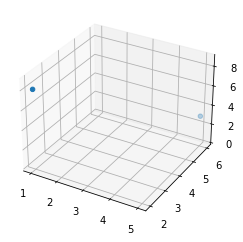

In [17]:
# Now let's plot them using matplotlib's Axes3D:

from mpl_toolkits.mplot3d import Axes3D
subplot3d = plt.subplot(111, projection = '3d')
x_coords, y_coords, z_coords = zip(a, b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

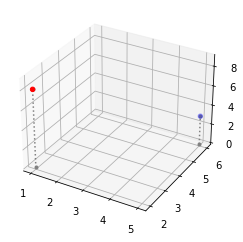

In [20]:
# It is a bit hard to visualize exactly where in space these two points are, so let's add vertical lines:

def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x, x], [y, y], [z0, z], color = 'gray', linestyle = 'dotted', marker = '.')
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection = '3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a, b], 0, color = ('r', 'b'))
plt.show()

## Norm

In [21]:
# The norm of a vector u, noted ∥u∥, is a measure of the length (magnitude) of u
# The norm of a vector is a function that assigns strictly positive values to vectors, except the zero-vector to which a value of 0 is assigned.

def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| = ")
vector_norm(u)

|| [2 5] || = 


5.385164807134504

In [22]:
# However, it is much more efficient to use NumPy's norm function, available in the linalg (Linear Algebra) module:

import numpy.linalg as LA
LA.norm(u)

5.385164807134504

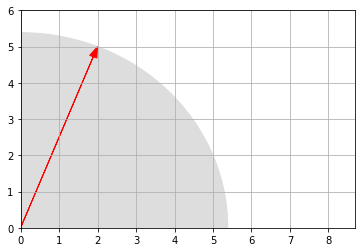

In [23]:
# Let's plot a little diagram to confirm that the length of vector v is indeed ≈5.4:

radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0, 0), radius, color = "#DDDDDD"))
plot_vector2d(u, color = "red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

## Addition

In [24]:
# Vectors of same size can be added together. Addition is performed elementwise:

print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

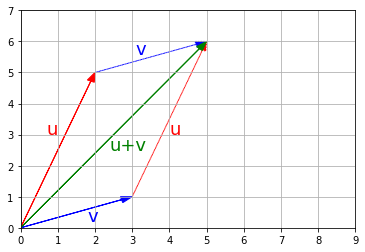

In [25]:
# Let's look at what vector addition looks like graphically:

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

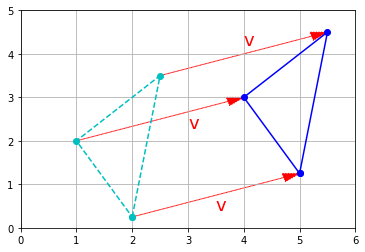

In [26]:
# Vector addition is commutative, meaning that u+v=v+u.
# Vector addition is also associative, meaning that u+(v+w)=(u+v)+w

t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()

## Multiplication

In [27]:
# Vectors can be multiplied by scalars. All elements in the vector are multiplied by that number, for example:

print("1.5 *", u, "=")
1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

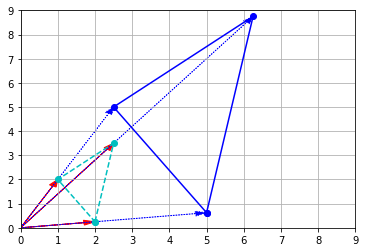

In [28]:
# Graphically, scalar multiplication results in changing the scale of a figure, hence the name scalar. The distance from the origin (the point at coordinates equal to zero) is also multiplied by the scalar. 
# For example, let's scale up by a factor of k = 2.5:

k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.grid()
plt.show()

In [29]:
# Scalar multiplication is commutative: λ×u = u×λ
# It is also associative: λ1×(λ2×u)=(λ1×λ2)×u
# It is distributive over addition of vectors: λ×(u+v) = λ×u + λ×v

## Zero, unit and normalized vectors

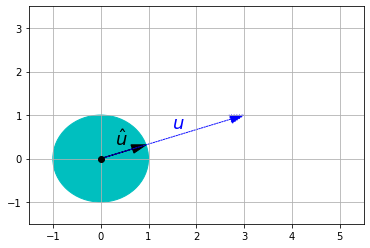

In [30]:
# A zero-vector is a vector full of 0s.
# A unit vector is a vector with a norm equal to 1.
# The normalized vector of a non-null vector u, is the unit vector that points in the same direction as u.

plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Dot Product

In [31]:
# The dot product (also called scalar product or inner product in the context of the Euclidian space) of two vectors u and v is a useful operation that comes up fairly often in linear algebra. 
# It is noted u⋅v, or sometimes ⟨u|v⟩ or (u|v), and it is defined as: u⋅v=∥u∥×∥v∥×cos(θ), where θ is the angle between u and v.

def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

11

In [32]:
# But a much more efficient implementation is provided by NumPy with the dot function:

np.dot(u,v)

11

In [33]:
# Equivalently, you can use the dot method of ndarrays:

u.dot(v)

11

In [34]:
# The dot product is commutative: u⋅v=v⋅u
# The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression u⋅v⋅w is not defined since u⋅v is a scalar and w is a vector.
# This also means that the dot product is NOT associative: (u⋅v)⋅w≠u⋅(v⋅w) since neither are defined.
# However, the dot product is associative with regards to scalar multiplication: λ×(u⋅v) = (λ×u)⋅v = u⋅(λ×v)
# Finally, the dot product is distributive over addition of vectors: u⋅(v+w) = u⋅v + u⋅w

In [35]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.8685393952858895 radians
      = 49.76364169072618 degrees


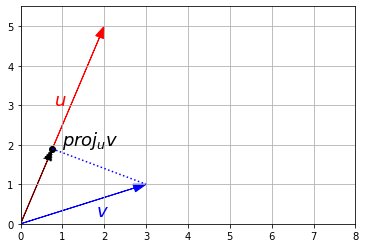

In [37]:
# The dot product is also very useful to project points onto an axis.
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

## Matrices

In [39]:
# Matrices are 2D lists of elements, of row x cols dimensions.

A = np.array([[1,2,3], [4,5,6], [7,8,9]])
A, A.shape

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 (3, 3))

## Matrix Multiplication

In [40]:
# Matrix Multiplication: Multiplying matrices A and B results in matrix C

B = np.random.rand(3,5)
C = np.dot(A, B)
C, C.shape

(array([[ 4.35222396,  3.52747585,  1.82243157,  0.90365222,  2.20554825],
        [10.89876022,  8.90761282,  4.25163452,  2.90244261,  5.7893915 ],
        [17.44529649, 14.28774979,  6.68083747,  4.901233  ,  9.37323475]]),
 (3, 5))

In [41]:
# Hadamard Product: The element-wise multiplication of matrices A and B, resulting in C. Denoted by A⊙B

A = np.random.randint(5, size=(3,3))
B = np.random.randint(5, size=(3,3))
C = np.multiply(A, B)

print(A)
print(B)
print(C)

[[2 2 4]
 [4 1 3]
 [4 4 0]]
[[3 3 3]
 [3 4 0]
 [4 3 3]]
[[ 6  6 12]
 [12  4  0]
 [16 12  0]]


## Rank of a matrix

In [42]:
# Rank: The maximum number of linearly independent columns/rows. Can be computed by finding the ref of the matrix and counting the non-zero rows.

from numpy.linalg import matrix_rank as rank
rank(A)

3

In [65]:
# define first matrix

from numpy import array
A = array([
            [1, 2, 3],
            [4, 5, 6]
         ])
print(A)
print('------')
# define second matrix
B = array([
            [1, 2, 3],
            [4, 5, 6]
         ])
print(B)
print('------')

[[1 2 3]
 [4 5 6]]
------
[[1 2 3]
 [4 5 6]]
------


## Addition of matrices

In [66]:
print("Addition of two matrices: ")
C = A + B # sub matrices, C = A - B
print(C)
print("\nMultiplication of two matrices: ") # also called Hadamard Product (element-wise multiplication)
Mul = A * B
print(Mul)
print("\nDivision of two matrices: ") 
Div = A * B
print(Div)

Addition of two matrices: 
[[ 2  4  6]
 [ 8 10 12]]

Multiplication of two matrices: 
[[ 1  4  9]
 [16 25 36]]

Division of two matrices: 
[[ 1  4  9]
 [16 25 36]]


## Matrix Dot Product

In [47]:
# matrix dot product

A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
print('------')

B = array([
[1, 2],
[3, 4]])
print(B)
print('------')

# multiply matrices

C = A.dot(B)       # you can also multiply matrices with @ operator , C = A @ B
print(C)

[[1 2]
 [3 4]
 [5 6]]
------
[[1 2]
 [3 4]]
------
[[ 7 10]
 [15 22]
 [23 34]]


In [48]:
# Creating diagonal matrix

from numpy import array
from numpy import diag

# define square matrix

M = array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])
print(M)
print('------')

# extract diagonal vector

d = diag(M)
print(d)
print('------')

# create diagonal matrix from vector

D = diag(d)
print(D)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
------
[1 5 9]
------
[[1 0 0]
 [0 5 0]
 [0 0 9]]


In [49]:
# Creating triangular matrices

from numpy import array
from numpy import tril
from numpy import triu

# define square matrix

M = array([
[1, 2, 3],
[1, 2, 3],
[1, 2, 3]])
print(M)
print('------')

# lower triangular matrix

lower = tril(M)
print(lower)
print('------')

# upper triangular matrix

upper = triu(M)
print(upper)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
------
[[1 0 0]
 [1 2 0]
 [1 2 3]]
------
[[1 2 3]
 [0 2 3]
 [0 0 3]]


## Identity matrix

In [63]:
from numpy import identity
I = identity(3)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Transpose of a matrix

In [62]:
A = array([
            [1, 2],
            [3, 4],
            [5, 6]
         ])
print(A)
print('-----')

# calculate transpose
C = A.T
print('Transpose of A: \n',C)

[[1 2]
 [3 4]
 [5 6]]
-----
Transpose of A: 
 [[1 3 5]
 [2 4 6]]


## Inverse of a matrix

In [57]:
from numpy.linalg import inv
A = array([
            [1.0, 2.0],
            [3.0, 4.0]
         ])
print(A)
print('------')

# invert matrix

B = inv(A)
print(B)

[[1. 2.]
 [3. 4.]]
------
[[-2.   1. ]
 [ 1.5 -0.5]]


## Determinant

In [53]:
# Determinant: The determinant of a square matrix is a scalar representation of the volume of the matrix.
# creating a 2X2 Numpy matrix

n_array = np.array([[50, 29], [30, 44]])
  
# Displaying the Matrix

print("Numpy Matrix is:")
print(n_array)
  
# calculating the determinant of matrix

det = np.linalg.det(n_array)
  
print("\nDeterminant of given 2X2 matrix:")
print(int(det))

Numpy Matrix is:
[[50 29]
 [30 44]]

Determinant of given 2X2 matrix:
1330


## Range and Nullspace of a matrix

In [55]:
from scipy.linalg import null_space
A = np.array([[1, 1], [1, 1]])
ns = null_space(A)
ns * np.sign(ns[0,0])  # Remove the sign ambiguity of the vector

array([[ 0.70710678],
       [-0.70710678]])

## Numpy for systems of equations

In [56]:
# Use NumPy to solve 'x' and 'y' in the following linear algebra equations:
# x + 2y = 5
# 3x + 4y = 7

import numpy as np
A = np.array([[1,2],[3,4]])
b = np.array([[5],[7]])
solution = np.linalg.solve(A,b)
x = solution[0][0]
y = solution[1][0]
print('x = {}'.format(x)) # -3
print('y = {}'.format(y)) # 4

x = -3.0
y = 4.0


## Polynomial object (Binomial Expansion)

In [67]:
from numpy import poly1d, array, tensordot
poly= poly1d([1,1,1,1,1], [1,1,1],[1,1,1])
print(poly)

           5             4              3              2
1 [1, 1, 1] - 5 [1, 1, 1] + 10 [1, 1, 1] - 10 [1, 1, 1] + 5 [1, 1, 1] - 1


In [68]:
# 2 variable table
n1=([(2,4+1,5) , (5,6,7)])
print(n1)

[(2, 5, 5), (5, 6, 7)]


In [69]:
# a different type of 2 variable table (maybe for pixels, images and sound)
n2=([(2j,4j+1,5j) , (5j,6j,7j)])
print(n2)

[(2j, (1+4j), 5j), (5j, 6j, 7j)]


In [73]:
b = np.array(
[[3,4],
 [5,6]])

#flattens the b array (matrix) into a one dimensional matrix
print(b.flatten())

[3 4 5 6]


In [74]:
# shape is used to find how many rows and colums are in matrix a 
print(b.shape)

(2, 2)


In [75]:
# In order to obtain each multiplication of at a dense mesh grid consisting of 2 different multi-dimensional matrixes
[q,p]= np.mgrid[0:5,0:5]
print(q)
print(p)
print(q*p)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]
 [ 0  4  8 12 16]]


In [76]:
#creates an open mesh grid of 2 differnt one dimensional matrixes
np.ogrid[0:5, 0:2]

[array([[0],
        [1],
        [2],
        [3],
        [4]]),
 array([[0, 1]])]

In [77]:
#finding the solution for a simultaneous equations with a dense matrix (matrix with more non-zero elements) (while sparze matrices contain more zero elements) 
SimultaneousEquations=([[2, 1], [3, 2]])
bAnswers=([[1],[4]])
solution= linalg.solve(SimultaneousEquations, bAnswers)
print(solution)

[[-2.]
 [ 5.]]


In [78]:
#finding the frobenius norm of a matrix 
Matrix1=([[2, 5], [8, 2]])
print(linalg.norm(Matrix1))

9.848857801796104


In [79]:
#finding the kronecker product of matrices kp1 and kp2 ( used especially in econometrics -the application of statistical methods to economic data)
kp1=([[1,2],[3,4]])
kp2=([[2,4],[5,3]])
print(np.kron(kp1,kp2))

[[ 2  4  4  8]
 [ 5  3 10  6]
 [ 6 12  8 16]
 [15  9 20 12]]


In [80]:
# finding the pseudo-inverse of matrix kp1 using the least squared method (used to find a linear model-in graphs, and when a system is overdetermined)
print(linalg.pinv(kp1))

[[-2.   1. ]
 [ 1.5 -0.5]]


## Exponential of matrix

In [81]:
#finding the exponential of a matrix - used to solve linear differential equations
print(linalg.expm(kp1))

[[ 51.9689562   74.73656457]
 [112.10484685 164.07380305]]


## Logarithm of Matrix

In [82]:
#finding the logarithm of a matrix

print(linalg.logm(kp1))

[[-0.35043981+2.39111795j  0.92935121-1.09376217j]
 [ 1.39402681-1.64064326j  1.04358699+0.7504747j ]]


In [83]:
#finding the Matrix sine
print(linalg.sinm(kp1))

[[-0.46558149 -0.14842446]
 [-0.22263669 -0.68821818]]


In [84]:
#finding the Matrix cosine
print(linalg.cosm(kp1))

[[ 0.85542317 -0.11087638]
 [-0.16631457  0.68910859]]


In [85]:
#finding the Matrix tangent
print(linalg.tanm(kp1))

[[-0.60507478 -0.31274165]
 [-0.46911248 -1.07418726]]


In [86]:
#matrix square root
print(linalg.sqrtm(kp1))

[[0.55368857+0.46439416j 0.80696073-0.21242648j]
 [1.21044109-0.31863972j 1.76412966+0.14575444j]]


In [87]:
#arbitrary functions
print(linalg.funm(kp1, lambda x: x*x))

[[ 7. 10.]
 [15. 22.]]


## Eigen values of matrix

In [88]:
#unpacks eigenvalues of matrix kp1
print(linalg.eigvals(kp1))

[-0.37228132+0.j  5.37228132+0.j]


## Eigen vectors of matrix

In [89]:
#eigenvalues and eigenvectors have applications in Schrodinger's equation, eigenfaces(in image processing), molecular orbitals, stress tensor, moment of inertia tensor
#eigenvalues and eigenvectors also apply in vibration analysis, basic reproduction number(the fundamental number in the study how infectious disease spread), geometric transformations
#eigenvalues and eigenvectors also have applications in google's pagerank algorithm, principal component analysis(in bioinformatics, data mining, psychology and marketing)
la, v = linalg.eig(kp1)  #Solve ordinary or generalized eigenvalue problem for a square matrix
l1, l2 = la #unpack eigenvalues
print(la)
print(v[:,0])  #first eigenvector 
print(v[:,1])  #second eigenvector
print(linalg.eigvals(kp1)) #unpacks eigenvalues

[-0.37228132+0.j  5.37228132+0.j]
[-0.82456484  0.56576746]
[-0.41597356 -0.90937671]
[-0.37228132+0.j  5.37228132+0.j]


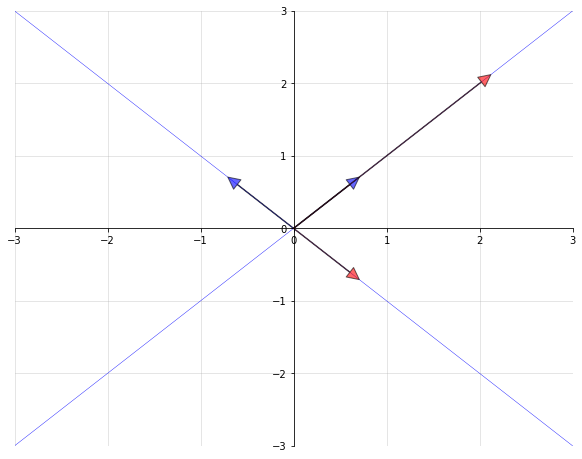

In [8]:
import numpy as np
from scipy.linalg import inv, solve, det, eig
import matplotlib.pyplot as plt
A = ((1, 2),
     (2, 1))
A = np.array(A)
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.grid(alpha=0.4)

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plot each eigenvector
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the image of each eigenvector
for v in evecs:
    v = A @ v
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.6,
                width=0.5))
    
# Plot the lines they run through
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()

## Range of a function

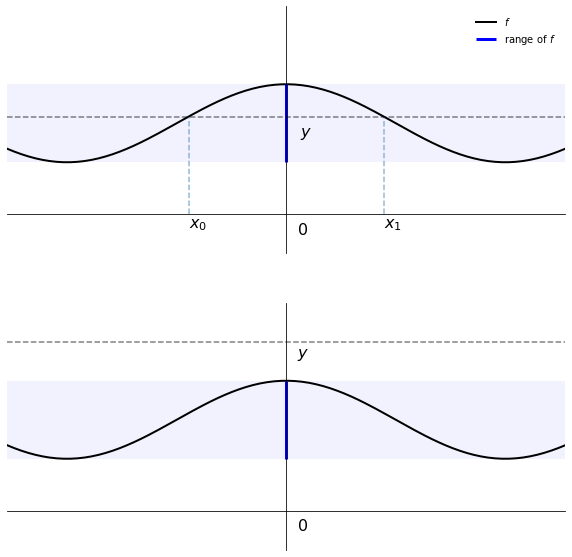

In [9]:
def f(x):
    return 0.6 * np.cos(4 * x) + 1.4


xmin, xmax = -1, 1
x = np.linspace(xmin, xmax, 160)
y = f(x)
ya, yb = np.min(y), np.max(y)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for ax in axes:
    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.set(ylim=(-0.6, 3.2), xlim=(xmin, xmax),
           yticks=(), xticks=())

    ax.plot(x, y, 'k-', lw=2, label='$f$')
    ax.fill_between(x, ya, yb, facecolor='blue', alpha=0.05)
    ax.vlines([0], ya, yb, lw=3, color='blue', label='range of $f$')
    ax.text(0.04, -0.3, '$0$', fontsize=16)

ax = axes[0]

ax.legend(loc='upper right', frameon=False)
ybar = 1.5
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.05, 0.8 * ybar, '$y$', fontsize=16)
for i, z in enumerate((-0.35, 0.35)):
    ax.vlines(z, 0, f(z), linestyle='--', alpha=0.5)
    ax.text(z, -0.2, f'$x_{i}$', fontsize=16)

ax = axes[1]

ybar = 2.6
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.04, 0.91 * ybar, '$y$', fontsize=16)

plt.show()

## Image compression using SVD

In [13]:
np.random.seed(42)
img = np.random.randint(0, 2, (7, 7))
print('Image matrix\n', img)
print('\nrank of matrix', np.linalg.matrix_rank(img))

Image matrix
 [[0 1 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [1 0 1 1 1 0 1]
 [0 1 1 1 1 1 1]
 [1 1 0 0 1 1 1]
 [0 1 0 0 0 0 0]
 [1 1 1 1 1 0 1]]

rank of matrix 6


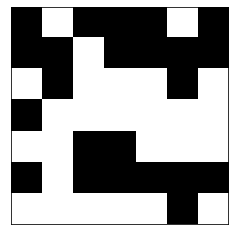

In [16]:
from matplotlib import pyplot
def plot_img(img):
    pyplot.imshow(img, cmap="gray")
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.show()
    
plot_img(img)

In [22]:
# Now, we will decompose this image using SVD.
U, S, V_T = np.linalg.svd(img)

print(U.shape, S.shape, V_T.shape)
with np.printoptions(precision=1):
    print("U: \n", U, "\n")
    print("V_T: \n", V_T)
    
print("\nS: ", np.around(S, decimals=4))

(7, 7) (7,) (7, 7)
U: 
 [[-1.5e-01 -5.9e-01 -2.2e-01  2.4e-02  1.9e-01  7.4e-01 -5.6e-17]
 [-8.5e-02  2.0e-01 -4.7e-01 -3.0e-02  8.3e-01 -2.1e-01  1.4e-17]
 [-4.5e-01  5.3e-01  1.7e-01  1.3e-01  2.6e-02  3.7e-01 -5.8e-01]
 [-5.3e-01 -1.5e-01 -5.4e-01  4.2e-01 -3.9e-01 -3.0e-01  5.3e-17]
 [-4.4e-01 -4.1e-01  6.2e-01  1.8e-01  3.4e-01 -3.3e-01 -7.3e-17]
 [-9.3e-02 -3.1e-01 -1.4e-01 -6.8e-01 -1.1e-01 -2.6e-01 -5.8e-01]
 [-5.4e-01  2.2e-01  3.4e-02 -5.5e-01 -8.1e-02  1.1e-01  5.8e-01]] 

V_T: 
 [[-3.3e-01 -4.0e-01 -3.7e-01 -3.5e-01 -4.5e-01 -2.6e-01 -4.5e-01]
 [ 1.7e-01 -6.1e-01  4.0e-01  3.0e-01  9.6e-02 -5.7e-01  9.6e-02]
 [ 6.4e-01 -1.8e-01 -6.2e-01 -2.5e-01  2.3e-01 -1.0e-01  2.3e-01]
 [-2.5e-01 -6.4e-01 -2.8e-02  3.6e-03  2.0e-01  6.7e-01  2.0e-01]
 [ 4.1e-01 -7.3e-02  5.6e-01 -6.5e-01 -1.6e-01  2.0e-01 -1.6e-01]
 [ 4.7e-01 -8.6e-02 -7.1e-02  5.5e-01 -4.2e-01  3.3e-01 -4.2e-01]
 [-0.0e+00  7.5e-17 -1.8e-16  1.5e-16  7.1e-01 -1.2e-16 -7.1e-01]]

S:  [4.3372 2.0078 1.3004 0.9417 0.6827 

(615, 926, 3)


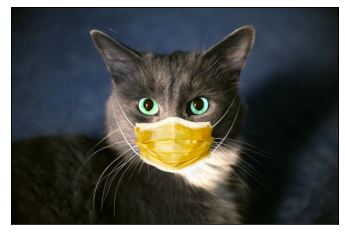

In [24]:
#compressing real image

import cv2
import requests

IMG_URL = "https://images.theconversation.com/files/350865/original/file-20200803-24-50u91u.jpg?ixlib=rb-1.1.0&rect=37%2C29%2C4955%2C3293&q=45&auto=format&w=926&fit=clip"

img_data = requests.get(IMG_URL).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)
    

image = cv2.imread("image.jpg")
print(image.shape)

plot_img(image)

(300, 400)


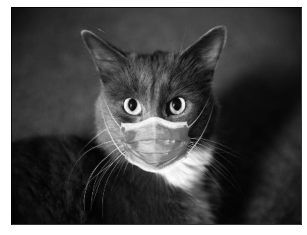

In [25]:
IMG_CAT = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# This image is very large in resolution so I am resizing it to smaller size.
IMG_CAT = cv2.resize(IMG_CAT, (400, 300))
print(IMG_CAT.shape)

plot_img(IMG_CAT)

In [26]:
np.linalg.matrix_rank(IMG_CAT)

300

In [27]:
# Rank of the image is 300 (which is a lot). Let's decompose it.

U, S, V_T = np.linalg.svd(IMG_CAT)
U.shape, S.shape, V_T.shape

((300, 300), (300,), (400, 400))

In [29]:
#helper functions

def svd(img, full_matrices=False):
    U, S, VT = np.linalg.svd(img, full_matrices=full_matrices)
    return (U, np.diag(S), VT)


def perc_storage(rank, n_rows, n_cols):
    original_space = n_rows*n_cols
    compressed_space = n_rows*rank + rank + n_cols*rank
    return compressed_space / original_space * 100


def perc_energy(S, r):
    return (np.trace(S[:r]) / np.trace(S)) * 100

def get_optimal_rank_by_energy(S, max_energy):
    max_rank_ = S.shape[0]
    opt_rank_ = 1
    
    while opt_rank_ <= max_rank_:
        energy = perc_energy(S, opt_rank_)
        if energy < max_energy:
            opt_rank_ += 1
            continue
        elif energy > max_energy:
            return opt_rank_ - 1
        else:
            return opt_rank_
    

def get_optimal_rank_by_storage(S, max_storage):
    max_rank_ = S.shape[0]
    opt_rank_ = 1
    
    while opt_rank_ <= max_rank_:
        storage = perc_storage(opt_rank_, *S.shape)
        if storage < max_storage:
            opt_rank_ += 1
            continue
        if storage > max_storage:
            return opt_rank_ - 1
        else:
            return opt_rank_

In [37]:
# As the SVD from numpy linalg package throws S not as a matrix but as array of values, so I defined a function which throws S as a diagonal matrix.

# perc_storage: Returns the percentage of storage taken by the compressed image.

# perc_energy: Returns the percentage of energy(sum of sigmas) taken by the compressed image.

#As we need to decide the rank of image upto which we want to compress, but this can't be done manually as this vary image to image. So, we will use the below functions for that, which returns optimal rank for given energy and storage.

#get_optimal_rank_by_energy: Gives the lowest rank for the given amount of energy.

#get_optimal_rank_by_storage: Gives the lowest rank for the given amount of storage.

#Let's decompose the image using SVD.

In [31]:
%%time
U, S_mat, V_T = svd(IMG_CAT)

print(f'U: {U.shape},   S: {S_mat.shape},   VT: {V_T.shape}')
print('\n')

U: (300, 300),   S: (300, 300),   VT: (300, 400)


CPU times: total: 93.8 ms
Wall time: 15.7 ms


In [32]:
%%time

MAX_ENERGY=85 # in percentage
MAX_STORAGE=30 # in percentage

# We will find the optimal rank using above defined functions.

opt_rank_by_energy = get_optimal_rank_by_energy(S_mat, MAX_ENERGY)
opt_rank_by_storage = get_optimal_rank_by_storage(S_mat, MAX_STORAGE)

print(f'optimum rank for {MAX_ENERGY}% energy is {opt_rank_by_energy}')
print(f'optimum rank for {MAX_STORAGE}% storage is {opt_rank_by_storage}')

print("\n")

optimum rank for 85% energy is 82
optimum rank for 30% storage is 44


CPU times: total: 0 ns
Wall time: 1.01 ms


CPU times: total: 656 ms
Wall time: 110 ms


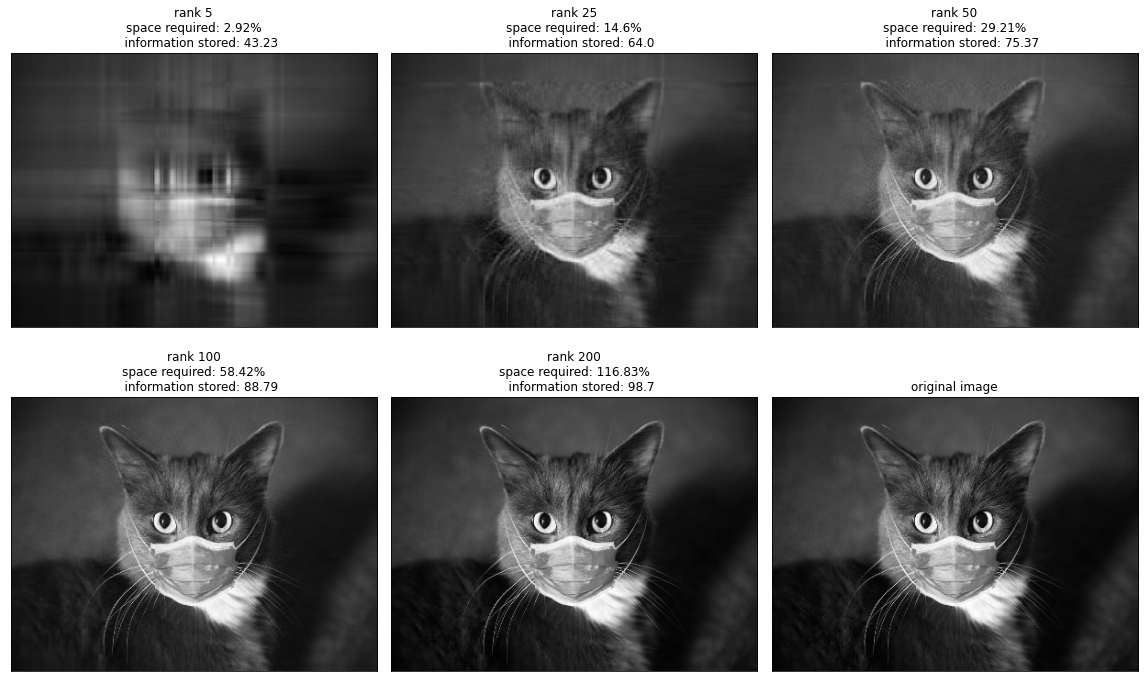

In [33]:
%%time

n_rows, n_cols = IMG_CAT.shape
RANKS = [5, 25, 50, 100, 200]

fig = pyplot.figure(0, (16, 10))

for idx, r in enumerate(RANKS):
    X_r = U[:, :r] @ S_mat[:r, :r] @ V_T[:r, :]

    ax = pyplot.subplot(2,3, idx+1)
    ax.imshow(X_r, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title(f'''rank {r}\nspace required: {round(perc_storage(r, n_rows, n_cols), 2)}%
    information stored: {round(perc_energy(S_mat, r), 2)}''')
        
ax = pyplot.subplot(2, 3, idx+2)
ax.imshow(IMG_CAT, cmap='gray')
ax.set_title('original image')
ax.set_xticks([])
ax.set_yticks([])

pyplot.tight_layout()

In [34]:
# We can see that rank 50 is a very good approximation, as it contains 75% information content keeping the storage requirement below 30%. So, we get 75% information by reducing 71% space, which is a lot saving keeping the image content very enriched.
# Many of us will stop at rank 50 approximation, some of us may go till rank 75 approximation and those you wants more clear image may go till rank 100. But the idea is there is always a trade between information retained and space required. It depends on your needs, if you want more quality image then you may go to higher rank approximations providing more image space but if space is limited to you then you will stop at initial ranks retaining maximum information in given space limits.

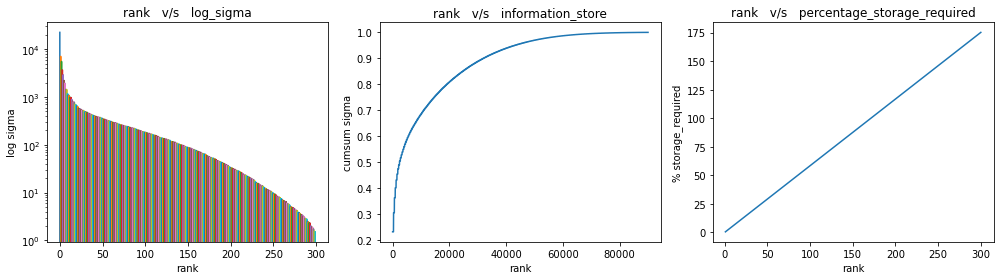

In [35]:
# Below is the plot showing the trade-off of rank with different attributes.

fig = pyplot.figure(0, (14, 4))

ax1 = pyplot.subplot(1, 3, 1)
ax1.semilogy(np.diag(S))
ax1.set_xlabel('rank')
ax1.set_ylabel('log sigma')
ax1.set_title('rank   v/s   log_sigma')

ax2 = pyplot.subplot(1, 3, 2)
ax2.plot(np.cumsum(np.diag(S) / np.sum(np.diag(S))))
ax2.set_xlabel('rank')
ax2.set_ylabel('cumsum sigma')
ax2.set_title('rank   v/s   information_store')


perc_strg = []
x_ticks = []
rank = np.linalg.matrix_rank(IMG_CAT)
for r in np.linspace(1, rank, 10):
    x_ticks.append(r)    
    perc_strg.append(perc_storage(r, n_rows, n_cols))


ax3 = pyplot.subplot(1, 3, 3)
ax3.plot(x_ticks, perc_strg)
ax3.set_xlabel('rank')
ax3.set_ylabel('% storage_required')
ax3.set_title('rank   v/s   percentage_storage_required')

pyplot.tight_layout()

## Linear Regression using ML

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = {
      'x': [1, 2, 3, 4, 5],
      'y': [1, 3, 2, 3, 5]
     }
df = pd.DataFrame(df)

# creating the dependent and independent variable
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

x_train = X.reshape(-1, 1)
y_train = Y.reshape(-1, 1)
print("independent variable", x_train)
print("dependent variable", y_train)

# creating a linear regression model

lm = LinearRegression()
lm.fit(x_train, y_train)
pred_y = lm.predict(x_train)
print('predicted', pred_y)

#calculate the mean square error

mse = mean_squared_error(y_train, pred_y)
print('MSE', mse)

independent variable [[1]
 [2]
 [3]
 [4]
 [5]]
dependent variable [[1]
 [3]
 [2]
 [3]
 [5]]
predicted [[1.2]
 [2. ]
 [2.8]
 [3.6]
 [4.4]]
MSE 0.4800000000000001


## References

1. https://www.kaggle.com/code/deepakdeepu8978/math-linear-algebra-for-machine-learning/notebook
2. https://www.kaggle.com/code/antmarakis/linear-algebra-quick-notes
3. https://www.kaggle.com/code/supreeth888/linear-algebra-for-machine-learning-using-numpy/notebook
4. https://www.kaggle.com/code/arifali77/linear-algebra-for-data-scientists
5. https://www.kaggle.com/code/mruanova/numpy-for-systems-of-equations-linear-algebra
6. https://www.kaggle.com/code/anihaldaran/linear-algebra
7. https://www.kaggle.com/code/gauravsharma99/compressing-images-using-linear-algebra